# JOIN DATA
Hasta aquí hemos realizado consultas que se podían satisfacer con la información disponible en una única tabla, pero, en general, nos encontraremos con que nuestra información se encuentra distribuida en distintas tablas. En estas situaciones, deberemos emplear *JOIN* para poder combinarlas.

Explicaremos esta instrucción con el siguiente ejemplo, donde tenemos una *Tabla de Mascotas* (con *id*, *nombre* y *animal*) y otra de *Tabla de Dueños*, la cual contiene un campo *Pet_id*, el cual servirá de vínculo con la anterior mencionada, mediante el uso de **JOIN ... ON**.

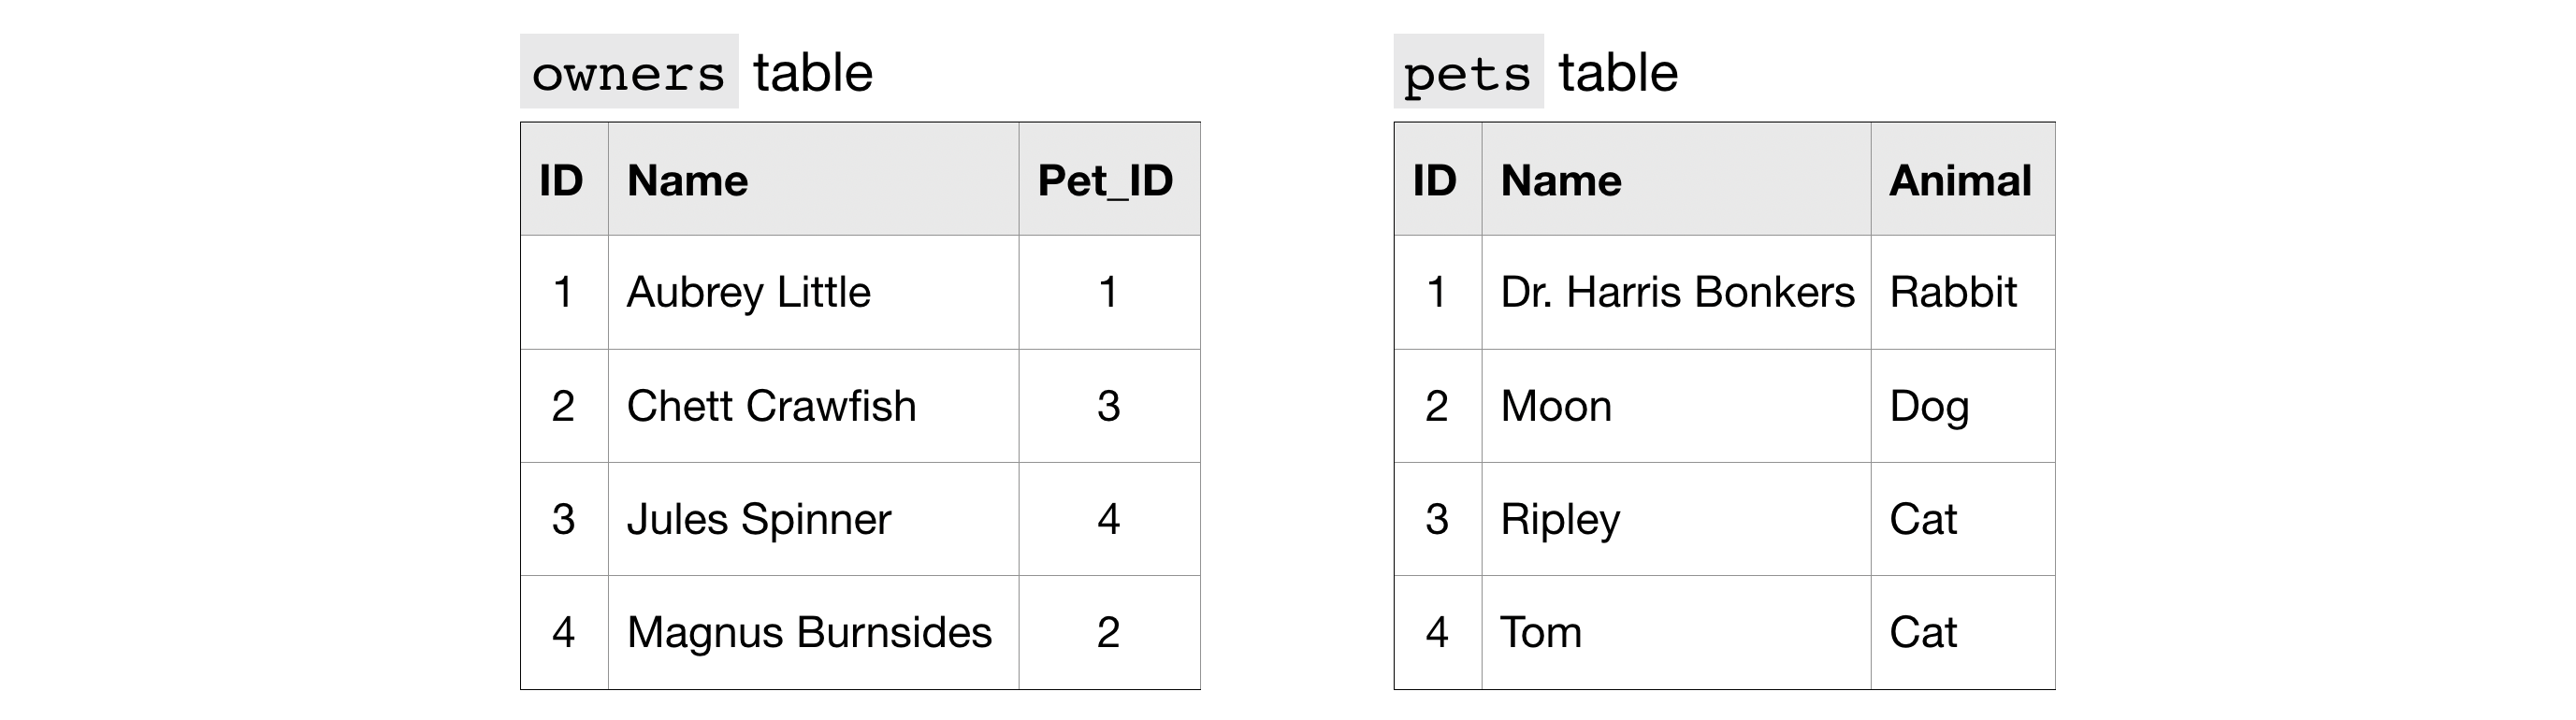

Entonces, para obtener información sobre cierta mascota, *"matcheamos"* su *id* con el *Pet_Id* de la tabla de dueños.
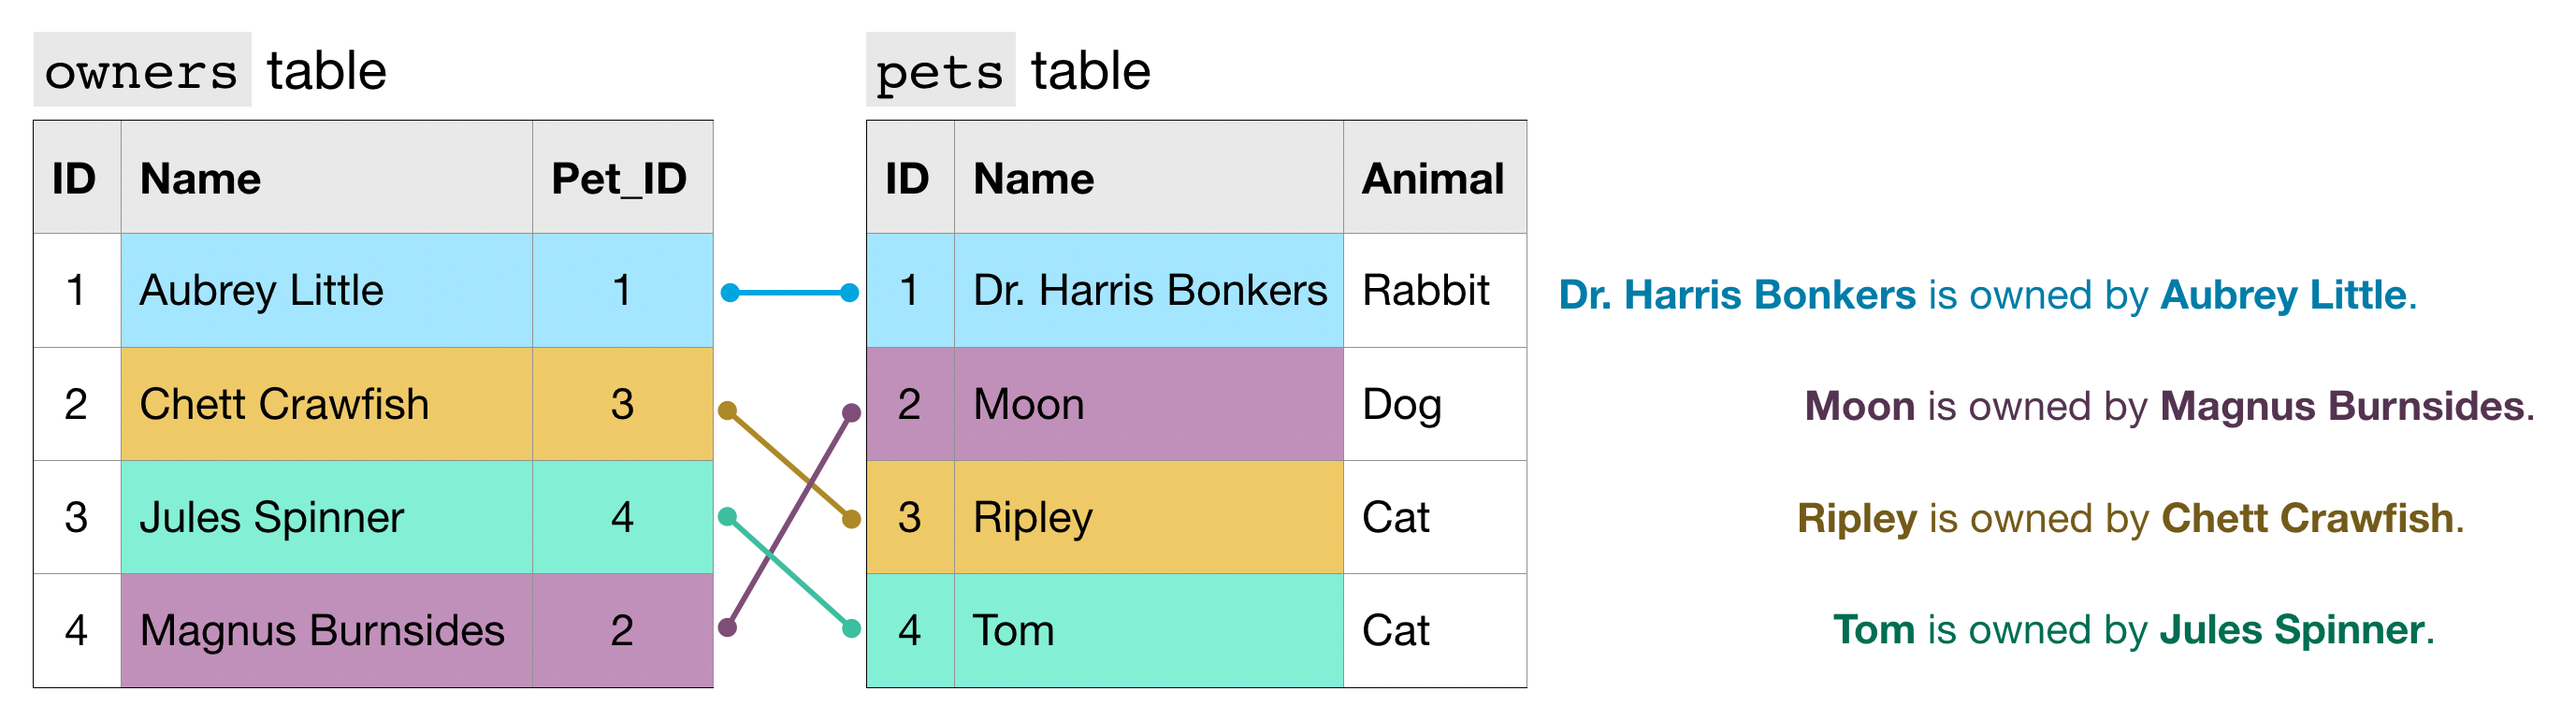


Utilizando *JOIN*, entonces, podremos obtener esta información en una consulta SQL, de la siguiente manera:
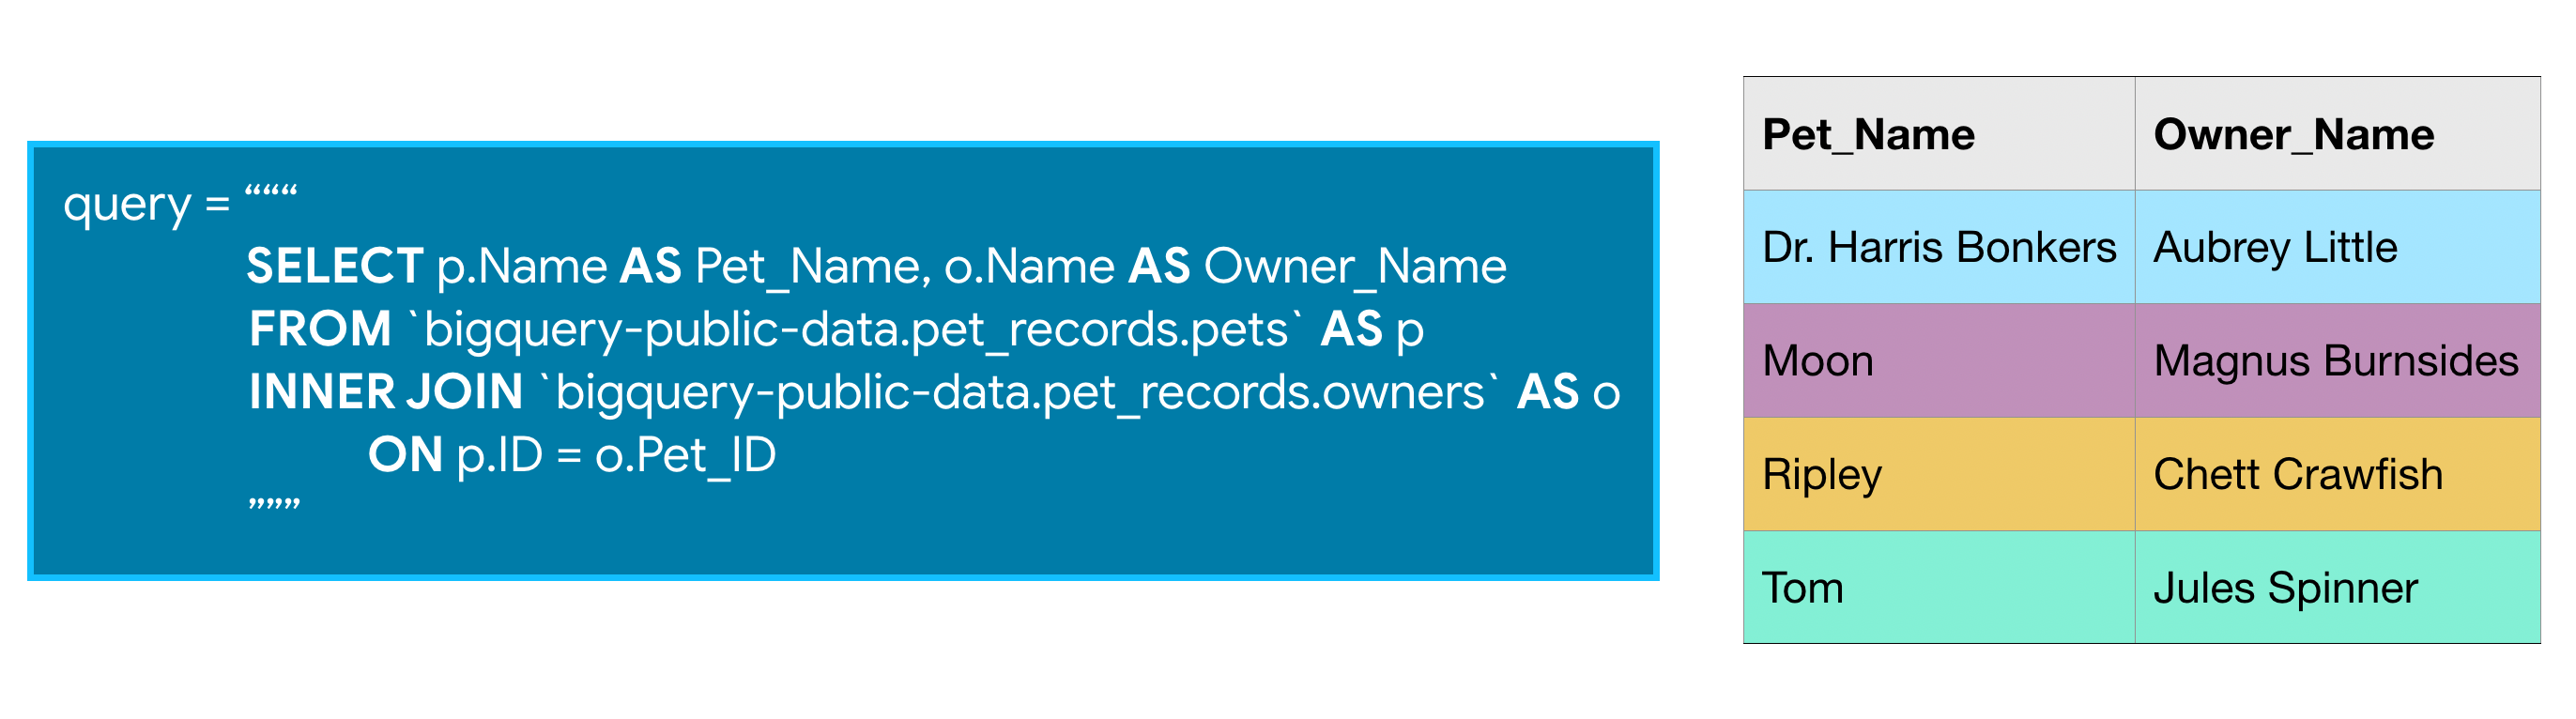

En la instrucción **ON** se utiliza para determinar qué columna se utiliza para combinar las tablas. Nótese que ambas contienen un campo *id*, por lo que se debe especificar a qué tabla corresponde (por eso se utiliza un alias en cada tabla y se refiere al campoco como *p.id*).

Por último, cabe mencionar que el *JOIN* utilizado aquí es un *INNER JOIN*, el cual tiene la característica de que **una fila sólo aparecerá en la tabla final si el valor de la columna que se está utilizando para combinar las tablas aparece en ambas de ellas** (en este ejemplo, sería, *si el 'id' de la mascota se tiene un dueño asociado y si el 'Pet_id' del dueño tiene una mascota generada con ese valor*). Caso contrario, no se incluye.


## LIKE
Esta instruccioón...

## Práctica
Utilizaremos, ahora, la *database "stackoverflow"* con el fin de practicar sobre ella lo aprendido en esta clase. Buscaremos desarrollar un servicio que sea capaz de identificar usuarios "expertos" en una tecnología con el fin de hacer disponible esta información a posibles reclutas que busquen emmpleados con estas características.

Para encontrar a los expertos nos basaremos en identificar aquellas personas que hayan respondido muchos posteos sobre un tema en particular.

In [3]:
from google.cloud import bigquery

client = bigquery.Client()

# dataset de stackoverflow
dataset_ref = client.dataset('stackoverflow', project='bigquery-public-data')
dataset = client.get_dataset(dataset_ref)

# tablas incluidas
tables = list(client.list_tables(dataset))
for table in tables:
    print(table.table_id)

badges
comments
post_history
post_links
posts_answers
posts_moderator_nomination
posts_orphaned_tag_wiki
posts_privilege_wiki
posts_questions
posts_tag_wiki
posts_tag_wiki_excerpt
posts_wiki_placeholder
stackoverflow_posts
tags
users
votes


In [7]:
answers_table_ref = dataset_ref.table('posts_answers')
answers_table = client.get_table(answers_table_ref)

client.list_rows(answers_table, max_results=5).to_dataframe()

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags,view_count
0,69637232,None,<p>I'd suggest trying pyspark/spark</p>\n<pre>...,None,None,1,NaT,2021-10-19 20:23:05.930000+00:00,None,2021-10-19 20:23:05.930000+00:00,NaT,None,NaN,None,13535120,69588989,2,0,None,None
1,69637234,None,<p>If you want to use higher-level functions y...,None,None,0,NaT,2021-10-19 20:23:26.823000+00:00,None,2021-10-19 20:23:26.823000+00:00,NaT,None,NaN,None,5003756,69637076,2,0,None,None
2,69637236,None,<p>To the first question</p>\n<blockquote>\n<p...,None,None,0,NaT,2021-10-19 20:23:32.983000+00:00,None,2021-10-19 20:23:32.983000+00:00,NaT,None,NaN,None,16523370,69635990,2,0,None,None
3,69637246,None,<p>If you want to access a class in another cl...,None,None,0,NaT,2021-10-19 20:24:13.700000+00:00,None,2021-10-19 20:24:13.700000+00:00,NaT,None,NaN,None,16653398,69637090,2,0,None,None
4,69637250,None,<p>putting content inside an extra <code>&lt;p...,None,None,0,NaT,2021-10-19 20:24:28.950000+00:00,None,2021-10-19 20:24:28.950000+00:00,NaT,None,NaN,None,4016922,69632918,2,0,None,None


Viendo las entradas de *posts_answers* no está claro cómo identificar a qué tecnología corresponde la respuesta en cuestión. Posee un campo *tags* pero, al menos las primeras filas, suelen estar incompletas. No obstante, si inspeccionamos la tabla *posts_questions*, veremos lo siguiente:

In [8]:
questions_table_ref = dataset_ref.table('posts_questions')
questions_table = client.get_table(questions_table_ref)

client.list_rows(questions_table, max_results=5).to_dataframe()

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags,view_count
0,3216259,Function overloading and inheritance,<blockquote>\n <p><strong>Possible Duplicate:...,NaN,0,4,NaT,2010-07-09 20:18:51.660000+00:00,1,2010-07-09 20:49:47.220000+00:00,2017-05-23 12:26:47.287000+00:00,None,-1,None,204623,None,1,0,c++|inheritance|overloading,218
1,3217039,how to pass a double with [n][n] values into a...,<blockquote>\n <p><strong>Possible Duplicate:...,3217086.0,0,0,NaT,2010-07-09 22:54:42.847000+00:00,0,2010-07-09 23:17:58.993000+00:00,2017-05-23 11:47:37.667000+00:00,None,-1,None,383217,None,1,0,iphone|objective-c,82
2,3217358,Convert simple code from Perl to PHP (issue),<blockquote>\n <p><strong>Possible Duplicate:...,NaN,0,0,NaT,2010-07-10 00:50:50.480000+00:00,0,2010-07-11 00:01:51.583000+00:00,2017-05-23 12:18:35.953000+00:00,None,-1,None,388226,None,1,0,php|perl|function|pack,302
3,3227205,how to send more than three variables by using...,"<p>how can i send 3 text box,1 select button v...",NaN,0,0,NaT,2010-07-12 09:24:01.383000+00:00,0,2010-07-12 09:52:52.373000+00:00,2010-07-12 09:25:48.027000+00:00,None,47738,None,386361,None,1,0,html,114
4,3232809,bitshift equivalent of math.round,<p>(Math.round(var/var1)*var1)</p>\n\n<p>What ...,NaN,0,0,NaT,2010-07-12 22:34:26.247000+00:00,0,2010-07-13 00:00:32.173000+00:00,2010-07-13 00:00:32.173000+00:00,None,354992,None,354992,None,1,0,javascript,191


Se observa que las preguntas tienen el campo *tag* completo con las distintas tecnologías a las que aplica la pregunta en cuestión. Entonces, si vinculásemos ambas tablas podríamos matchear la respuesta del "experto" con la tecnología correspondiente.

Nuestra query devolverá 



In [20]:
# query con respesutas a bigquery-related
bigquery_answers_query = '''
SELECT q.body AS question, a.body AS answer, a.owner_user_id AS answer_expert
FROM `bigquery-public-data.stackoverflow.posts_answers` as a
INNER JOIN `bigquery-public-data.stackoverflow.posts_questions` as q
    ON q.id = a.parent_id
WHERE q.tags LIKE '%bigquery%'
'''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=27*10**10)
bigquery_answers_query_job = client.query(bigquery_answers_query, job_config=safe_config)
bigquery_answers = bigquery_answers_query_job.to_dataframe()

tech_experts.head()

,body,body_1,owner_user_id
0,<p>BigQuery's browser interface is practically...,"<p>It worked. I was not ""Disabling the options...",2344323.0
1,<p>Our main table has 92 MBytes with 410k line...,<p>thanks so much for your quick answer. As yo...,2811087.0
2,<p>We have an event table with users registeri...,<p>To get the number of active users I would p...,1401986.0
3,"<p>I am using Ubuntu, and installed the bigque...",<p>Check the permissions on <code>/usr/local/l...,1200610.0
4,<p>I have followed the instructions in\n<a hre...,<p>Actually there are two areas from where you...,1127600.0


In [17]:
bigquery_experts_query = '''
SELECT a.owner_user_id AS user_id, COUNT(1) AS numAnswers
FROM `bigquery-public-data.stackoverflow.posts_answers` as a
INNER JOIN `bigquery-public-data.stackoverflow.posts_questions` as q
    ON q.id = a.parent_id
WHERE q.tags LIKE '%bigquery%'
GROUP BY user_id
ORDER BY numAnswers DESC
'''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=27*10**10)
bigquery_experts_query_job = client.query(bigquery_experts_query, job_config=safe_config)
bigquery_experts = bigquery_experts_query_job.to_dataframe()

bigquery_experts.head()

,user_id,numAnswers
0,5221944.0,4497
1,1144035.0,1636
2,132438.0,900
3,6253347.0,736
4,1366527.0,620


**EXTRA:** crear una solución más adaptada a la realidad, mediante una función que una aplicación web pudiera llamar en *backend*.

**NOTA:** para incluir una **variable dentro de un String en la Query** (instrucción *LIKE*) se utiliza **paréntesis**.

In [22]:
def get_experts(topic, client):
    ''' Devuelve un DataFrame de usuarios que hayan demostrado experiencia en determinada
    tecnología, al haber respondido varias preguntas sobre la misma.
    
    @args:
        topic: tecnología que interesa obtener expertos
        client: objeto Client que especifica la conexión con el dataset de Stackoverflow
    
    >> get_experts('sql')
    DataFrame(user_id, numAnswers)
    '''
    
    bigquery_experts_query = '''
    SELECT a.owner_user_id AS user_id, COUNT(1) AS numAnswers
    FROM `bigquery-public-data.stackoverflow.posts_answers` as a
    INNER JOIN `bigquery-public-data.stackoverflow.posts_questions` as q
        ON q.id = a.parent_id
    WHERE q.tags LIKE '%(topic)%'
    GROUP BY user_id
    ORDER BY numAnswers DESC
    '''

    safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=27*10**10)
    bigquery_experts_query_job = client.query(bigquery_experts_query, job_config=safe_config)
    bigquery_experts = bigquery_experts_query_job.to_dataframe()
    
    return bigquery_experts


# get DataFrame with (expert_id, num_answers)
experts = get_experts('python')
experts.head()

,user_id,numAnswers
0,5221944.0,4497
1,1144035.0,1636
2,132438.0,900
3,6253347.0,736
4,1366527.0,620
